# Logistic Regression

This notebook will go through a machine learning implementation of Logistic Regression, as well as implementing Regularization within the model.

### Setup

First let's import some data, and view it.

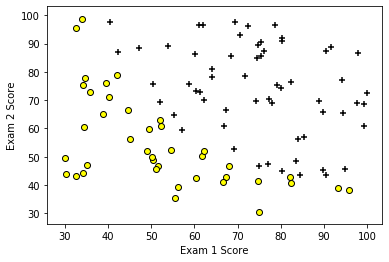

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

data = np.genfromtxt('data/ex2data1.txt', delimiter=',')
df = pd.read_csv('data/ex2data1.txt',delimiter=',',
                 header=None,
                 names=['Exam Score 1','Exam Score 2','Pass or Fail'])
pass_df = df[df['Pass or Fail']==1]
fail_df = df[df['Pass or Fail']==0]

plt.scatter(pass_df['Exam Score 1'], pass_df['Exam Score 2'], marker='+', color='black')
plt.scatter(fail_df['Exam Score 1'], fail_df['Exam Score 2'], marker='o', color='yellow', edgecolors='black')
plt.ylabel('Exam 2 Score')
plt.xlabel('Exam 1 Score')
plt.show()

Now let's convert our data into a numpy matrix, so we can easily vectorize our calculations.

In [15]:
X = np.asmatrix(df[['Exam Score 1', 'Exam Score 2']].to_numpy())
Y = np.asmatrix(df['Pass or Fail'].to_numpy())
# Transpose Y so the rows represent the number of training examples
Y = Y.T


In Logistic Regression our hypothesis function is defined as:
\begin{equation*}
h_\theta(x) = g(\theta^Tx)
\end{equation*}
Where the function g is the sigmoid function:
\begin{equation*}
g(z) = \frac{1}{1+e^{-z}}
\end{equation*}

In code this is:

In [16]:
def sigmoid(z):
   return (1 / (1 + np.exp(-z)))

Now let's implement this in a cost function

In [28]:
def costFunction(theta, X, Y):
    # Get hypothesis
    h = sigmoid(X*theta)
    #h = X*theta
    # Calculate cost
    J = (1/m)*(-Y.T * np.log(h) - (1-Y).T * np.log(1-h))
    
    # Calculate gradient
    grad = (1/m)* X.T*(h-Y)
    
    return J, grad

In [33]:
# TODO: check that above is correct and works
# Initialize variables

# add column of 1s
ones = np.transpose(np.matrix(np.ones(len(X))))
X_h = np.hstack((ones, X))
m,n = X.shape

theta = np.zeros((X_h.shape[1],1))

J, grad = costFunction(theta, X_h, Y)
print(J)
print(grad)

theta = np.matrix('-24; 0.2; 0.2')
J, grad = costFunction(theta, X_h, Y)
print(J)
print(grad)

[[0.69314718]]
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
[[0.21833019]]
[[0.04290299]
 [2.56623412]
 [2.64679737]]


Now let's try this in a gradient descent implementation.

In [ ]:
def gradientDescent(costFunction, theta, X, Y, n):
    
    # Add column of 1s to our X matrix
    ones = np.transpose(np.matrix(np.ones(len(X))))
    X = np.hstack((ones, X))
    
    # Initialize theta as zeros
    theta = np.zeros((X.shape[1],1))
    theta_vals = [np.asmatrix(theta)]
    
    J_vals = np.empty(n+1)
    J_vals[0], grad = costFunction(theta, X, Y)